## Matrice d'intéraction entre les bactéries et les phages

In [ ]:
import pandas as pd

df = pd.read_excel("data/InteractionsPhages_PseudomonasAeruginosa_Revised.xlsx")
df

,bacterium_id,bacteriophage_id
0,5160,5281
1,5161,5281
2,5164,5281
3,5166,5281
4,5167,5281
...,...,...
270,5190,5322
271,5192,5322
272,5194,5322
273,5163,5323


In [13]:
print("Nombre d'id de bactérie différent : ", len(df["bacterium_id"].unique()))
print("Nombre d'id de bactériophage différent : ", len(df["bacteriophage_id"].unique()))

Nombre d'id de bactérie différent :  43
Nombre d'id de bactériophage différent :  42


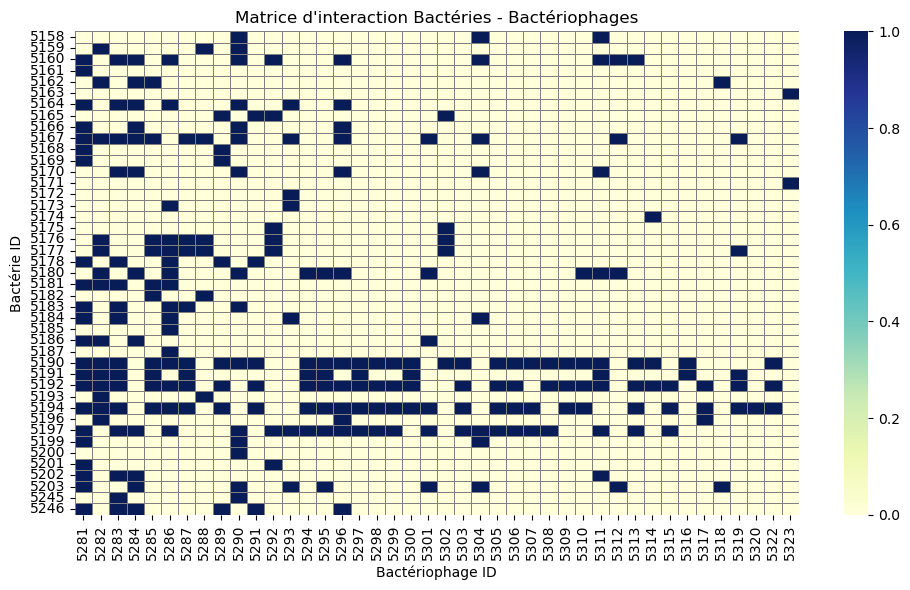

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

interaction_matrix = pd.crosstab(df['bacterium_id'], df['bacteriophage_id'])

plt.figure(figsize=(10, 6))
ax = sns.heatmap(interaction_matrix, cmap="YlGnBu", cbar=True, linewidths=0.5, linecolor='gray')

# Forcer l'affichage de tous les ticks sur Y
ax.set_yticks([i + 0.5 for i in range(len(interaction_matrix.index))])
ax.set_yticklabels(interaction_matrix.index, rotation=0)

# Forcer tous les ticks sur X aussi (optionnel)
ax.set_xticks([i + 0.5 for i in range(len(interaction_matrix.columns))])
ax.set_xticklabels(interaction_matrix.columns, rotation=90)

# Titres et labels
plt.title("Matrice d'interaction Bactéries - Bactériophages")
plt.xlabel("Bactériophage ID")
plt.ylabel("Bactérie ID")
plt.tight_layout()
plt.show()  

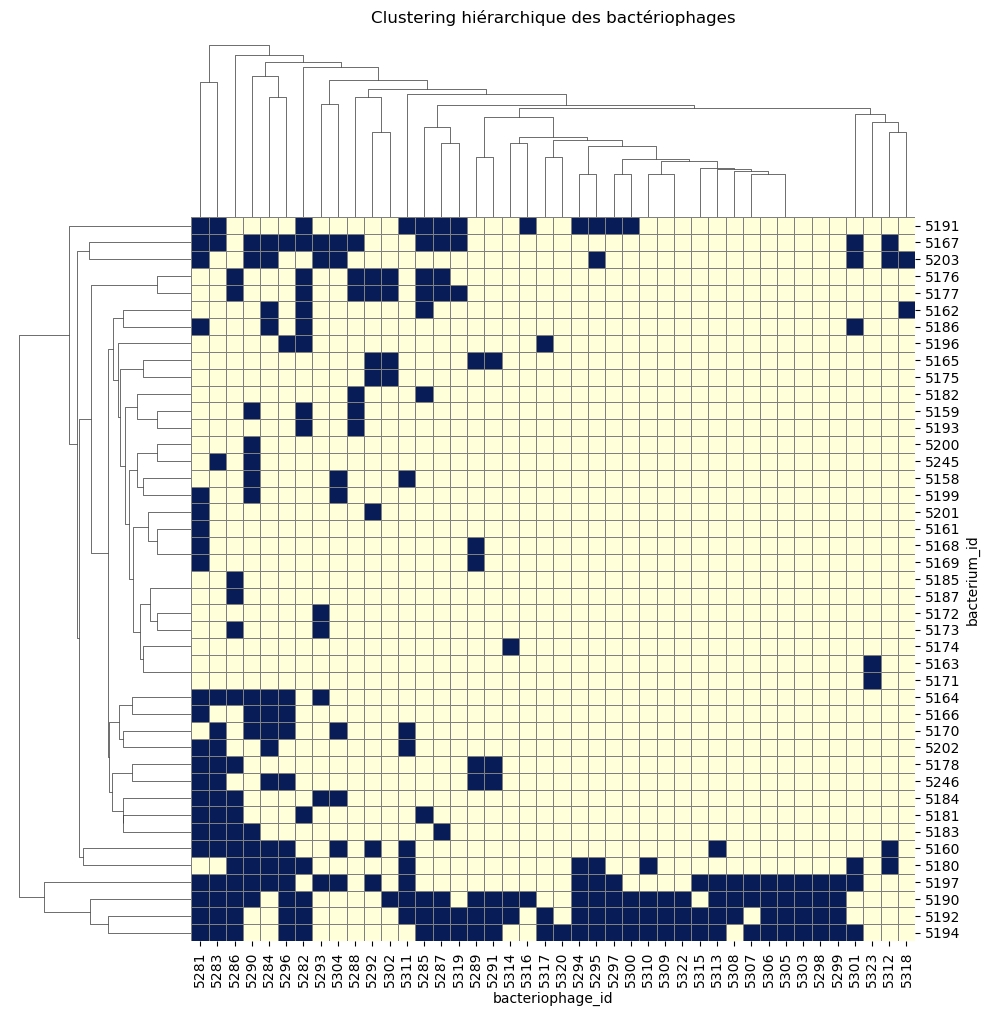

In [ ]:
# Matrice d'interaction
interaction_matrix = pd.crosstab(df['bacterium_id'], df['bacteriophage_id'])

# Clustermap avec tri hiérarchique sur les colonnes (phages)
cluster = sns.clustermap(interaction_matrix, 
               cmap="YlGnBu",
               cbar_pos=None,
               linewidths=0.5, 
               linecolor='gray',
               col_cluster=True,    # tri hiérarchique sur les colonnes
               row_cluster=True,     # tri hiérarchique sur les lignes)
)

# Récupérer les bons ordres d’étiquettes après clustering
row_order = cluster.dendrogram_row.reordered_ind
col_order = cluster.dendrogram_col.reordered_ind

# Appliquer les étiquettes dans le bon ordre
ax = cluster.ax_heatmap
ax.set_yticks([i + 0.5 for i in range(len(row_order))])
ax.set_yticklabels(interaction_matrix.index[row_order], rotation=0)

ax.set_xticks([i + 0.5 for i in range(len(col_order))])
ax.set_xticklabels(interaction_matrix.columns[col_order], rotation=90)

plt.title("Clustering hiérarchique des bactériophages", pad=140)
plt.show()